# Google Brain - Ventilator Pressure Prediction(Using TensorFlow)

In [ ]:
# Installing the modules

!pip3 install kaggle

In [ ]:

# Required modules

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from zipfile import ZipFile
from google.colab import files
from matplotlib import pyplot as plt

In [ ]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

In [ ]:
# Upload the creds

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anurag1817","key":"fee9a6f9d27c73cdef9835b97335e533"}'}

In [ ]:
# Create kaggle folder

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Test the command

!kaggle competitions download -c ventilator-pressure-prediction

 98% 136M/139M [00:01<00:00, 121MB/s]
100% 139M/139M [00:01<00:00, 128MB/s]
  0% 0.00/8.50M [00:00<?, ?B/s]
100% 8.50M/8.50M [00:00<00:00, 73.3MB/s]
 86% 65.0M/75.4M [00:00<00:00, 71.4MB/s]
100% 75.4M/75.4M [00:00<00:00, 96.8MB/s]


In [ ]:
# Opening the zipfile

with ZipFile('train.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('test.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('sample_submission.csv.zip', 'r') as zf:
    zf.extractall('./')

In [ ]:
# Load the train data

train = pd.read_csv('train.csv', index_col=['id'])
train.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492
2,1,20,50,0.033652,18.383041,0,5.907794
3,1,20,50,0.067514,22.509278,0,7.876254
4,1,20,50,0.101542,22.808822,0,11.742872
5,1,20,50,0.135756,25.355850,0,12.234987


In [ ]:
# Inspecting the train data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6036000 entries, 1 to 6036000
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   breath_id  int64  
 1   R          int64  
 2   C          int64  
 3   time_step  float64
 4   u_in       float64
 5   u_out      int64  
 6   pressure   float64
dtypes: float64(3), int64(4)
memory usage: 368.4 MB


,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


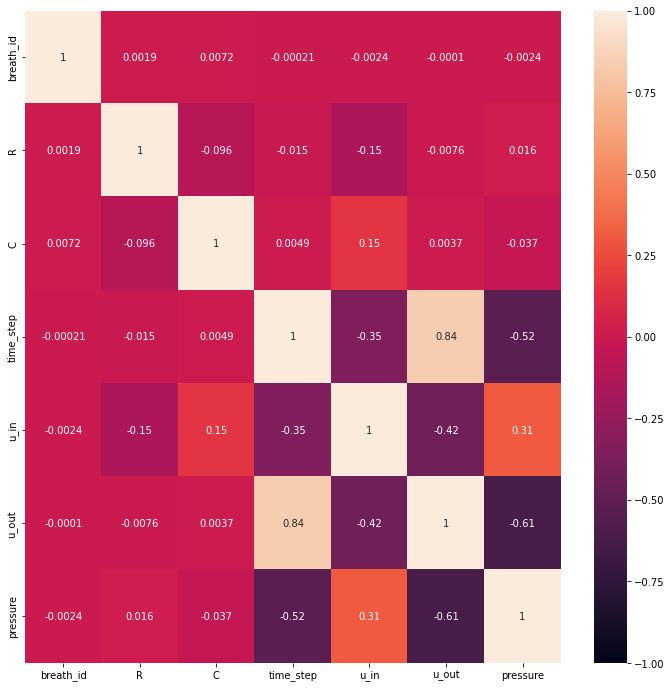

In [ ]:
# Correlation matrix

sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
# Missing values

if train.isna().any().any():
    print(train.isna().sum()/train.shape[0])
else:
    print("No Mising values")

No Mising values


In [ ]:
# Seperating out features and labels

X = train.drop(['pressure'], axis=1)
y = train['pressure']

## TensorFlow Stuff

In [ ]:
# Model Definition

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='linear'),
])

In [ ]:
# Compiling the model

optim = tf.keras.optimizers.Adam()
loss = tf.keras.losses.mean_absolute_error

model.compile(optimizer=optim, loss=loss, metrics=['mse'])

In [ ]:
# Fitting the model

epochs = 10
batch_size = 64

history = model.fit(x=X, y=y, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Epoch 1/10
75450/75450 [==============================] - 248s 3ms/step - loss: 7.0292 - mse: 12645.5215 - val_loss: 5.0733 - val_mse: 83.3027
Epoch 2/10
75450/75450 [==============================] - 250s 3ms/step - loss: 5.0486 - mse: 82.2927 - val_loss: 5.0734 - val_mse: 83.4051
Epoch 3/10
75450/75450 [==============================] - 263s 3ms/step - loss: 4.9526 - mse: 79.8229 - val_loss: 4.5903 - val_mse: 71.6093
Epoch 4/10
75450/75450 [==============================] - 264s 3ms/step - loss: 4.6494 - mse: 72.3241 - val_loss: 4.0641 - val_mse: 57.9361
Epoch 5/10
75450/75450 [==============================] - 262s 3ms/step - loss: 4.5808 - mse: 70.5927 - val_loss: 3.9693 - val_mse: 55.5966
Epoch 6/10
75450/75450 [==============================] - 264s 3ms/step - loss: 4.5880 - mse: 70.6656 - val_loss: 5.0136 - val_mse: 82.6109
Epoch 7/10
75450/75450 [==============================] - 266s 4ms/step - loss: 4.6311 - mse: 71.5540 - val_loss: 4.6445 - val_mse: 73.3703
Epoch 8/10
75450/

In [ ]:
# Model Summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 7)                 49        
_________________________________________________________________
dropout (Dropout)            (None, 7)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                

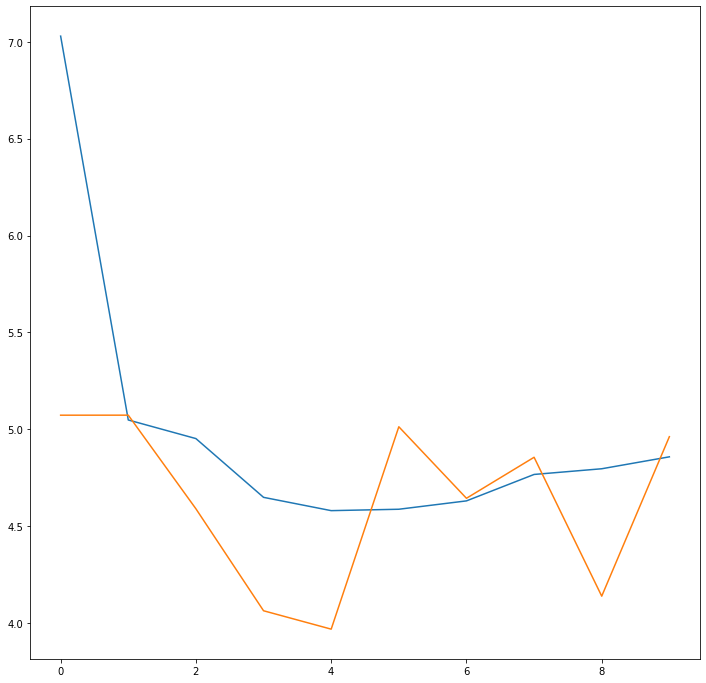

In [ ]:
# Plotting the mae

plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')

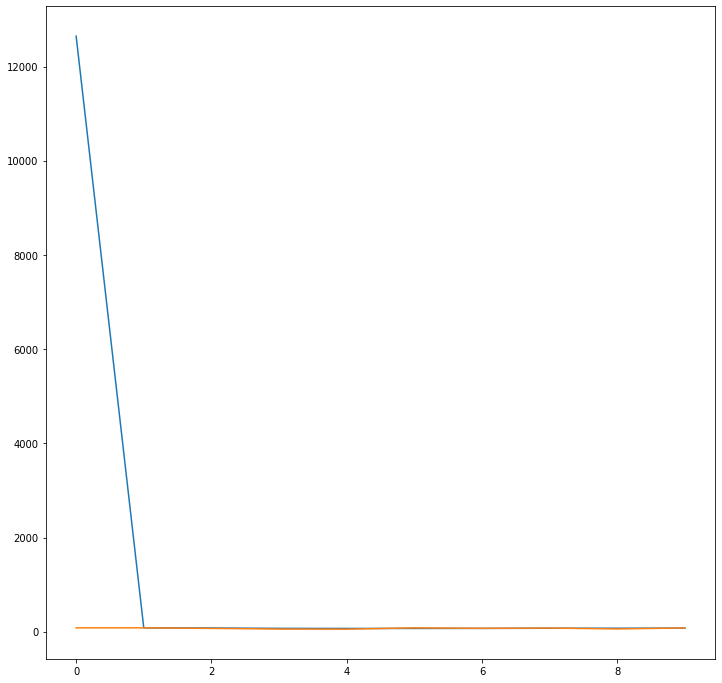

In [ ]:
# Plotting the mse

plt.plot(range(epochs), history.history['mse'], label='Training MSE')
plt.plot(range(epochs), history.history['val_mse'], label='Validation MSE')

In [ ]:
# Loading the test set

test = pd.read_csv('test.csv', index_col=['id'])
test.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,breath_id,R,C,time_step,u_in,u_out
id,,,,,,
1,0,5,20,0.000000,0.000000,0
2,0,5,20,0.031904,7.515046,0
3,0,5,20,0.063827,14.651675,0
4,0,5,20,0.095751,21.230610,0
5,0,5,20,0.127644,26.320956,0


In [ ]:
# Prediction on test set

test_pred = model.predict(test)

In [ ]:
# Submission

submission = pd.read_csv('sample_submission.csv')
submission['pressure'] = test_pred
submission.to_csv('output.csv', index=False)

In [ ]:
# Kaggle Submission

!kaggle competitions submit -c ventilator-pressure-prediction -f output.csv -m "TF with dropouts"

100% 68.0M/68.0M [00:02<00:00, 30.7MB/s]
Successfully submitted to Google Brain - Ventilator Pressure Prediction